In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


In [15]:
def ReLU(X):
    return np.maximum(0,X)

def ReLU_Derivative(X):
    return X > 0

class TwoLayerNN:
    def __init__(self, numInput, numHidden):
        self.W1 = np.random.rand(numInput, numHidden)*2-1
        self.b1 = np.random.rand(numHidden)*2-1
        self.W2 = np.random.rand(numHidden, 1)*2-1
        self.b2 = np.random.rand(1)*2-1
        
    def feedForward(self, X):
        net2 = self.W1.T @ X.T + self.b1[:,np.newaxis]
        o2 = ReLU(net2) #shape (20,10)
        net3 = self.W2.T @ o2 + self.b2[:,np.newaxis]
        return net3
    
    def backprop(self, X, Y):
        net2 = self.W1.T @ X.T + self.b1[:,np.newaxis]
        o2 = ReLU(net2) 
        net3 = self.W2.T @ o2 + self.b2[:,np.newaxis]
        
        delta2 = 2*(net3 - Y) 
        
        self.b2_gradient = delta2 
        self.W2_gradient = o2 @ delta2.T 

        delta1 = self.W2 @ delta2 
        
        o2_deriv = ReLU_Derivative(net2) 
        
        self.b1_gradient = delta1 * o2_deriv 
        self.W1_gradient = X.T @ (self.b1_gradient).T 
        
    def draw(self, X, Y, K):
        assert(X.shape[0] == Y.shape[0])
        indices = np.random.choice(X.shape[0], K, replace=False)
        return X[indices], Y[indices]
    
    def fit(self, X, Y, nu, K, numIterations):
        
        for i in range(numIterations):
            X_batch, Y_batch = self.draw(X, Y, K)
            self.backprop(X_batch, Y_batch)
            self.W1 -= nu*self.W1_gradient
            self.b1 -= nu*np.sum(self.b1_gradient, axis = 1)
            self.W2 -= nu*self.W2_gradient
            self.b2 -= nu*np.sum(self.b2_gradient, axis = 1)
            
            if i % 5000 == 0:
                diff = self.feedForward(X)-Y
                print("The lse is ", np.inner(diff, diff))
               

In [19]:
def PlotContourLine(func, value=0, minx=0, maxx=10, miny=0, maxy=10):
    #This plots the contourline func(x) = value
    
    samplenum = 1000
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    #plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, colors=('red', 'blue'))


The lse is  [[415.34520601]]
The lse is  [[108.3432837]]
The lse is  [[95.47852548]]
The lse is  [[87.64007048]]
The lse is  [[82.65388128]]
The lse is  [[74.36933034]]
The lse is  [[68.95962889]]
The lse is  [[68.48293261]]
The lse is  [[72.5455327]]
The lse is  [[63.87544666]]


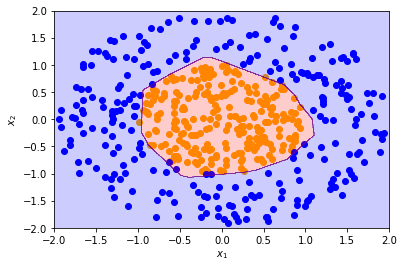

In [28]:
b = np.random.multivariate_normal(np.zeros(2), np.eye(2), 10000) 
u = np.power(np.random.rand(10000)*4, 0.5)
b = normalize(b) * u.reshape(u.size,1)
norms = np.linalg.norm(b, axis = 1)
x = np.append(b[norms < 1][:250], b[norms > 1][:250], axis = 0)
y = np.append(-np.ones(250), np.ones(250))

clf = TwoLayerNN(2,20)
clf.fit(x,y,0.001,10,50000)

plt.scatter(x[:250,0],x[:250,1],c='orange')
plt.scatter(x[250:,0],x[250:,1],c='blue')
PlotContourLine(clf.feedForward,0,-2,2,-2,2)